In [1]:
import gym
import warnings
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm, trange
from cryoenv.mqtt import SoftActorCritic, ReturnTracker, HistoryWriter
%config InlineBackend.figure_formats = ['svg']

In [2]:
np.random.seed(2)
# 1, 300 steps --> found after ~ 50 steps, 150 steps --> found after ~ 50 steps
# 2, 300 steps --> ..., 150 steps --> found after ~ 50 steps
# 3, 300 steps --> ..., 150 steps --> ...
# 4, 300 steps --> ..., 150 steps --> ...
# 5
# 6
# 7
# 8

In [3]:
torch.cuda.is_available()

False

In [4]:
warnings.simplefilter('ignore')
gym.logger.set_level(40)

In [5]:
buffer_size = 1000

env = gym.make('cryoenv:cryoenv-sig-v0',
                   omega=0,
                   sample_pars=False,
                   log_reward=True,
                   rand_start=True,
                   pars={'store_raw': False,
                         'max_buffer_len': buffer_size,
                         'tpa_queue': [1],
                         'pileup_prob': 0.,
                         'xi': np.array([1e2]),
                         'tau': np.array([45]), 
                         'tp_interval': 10},
               render_mode='human',
                   )

In [6]:
obs, info = env.reset()

In [7]:
model = SoftActorCritic(env, policy = "GaussianPolicy", critic = "QNetwork", lr=1e-2, buffer_size=buffer_size, learning_starts=0,
                        batch_size=16, gamma=.9, gradient_steps=10, grad_clipping=.5, tau=0.05, 
                        device='cuda' if torch.cuda.is_available() else 'cpu')

In [8]:
tracker = ReturnTracker()
writer = HistoryWriter()

In [9]:
model.learn(episodes = 20, 
            episode_steps = 20, 
            two_pbars=True,
            tracker=tracker,
            writer=writer)

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

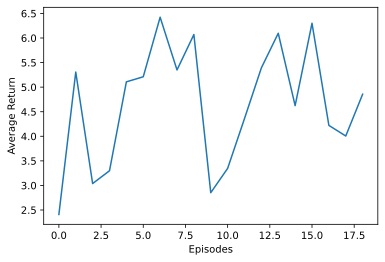

In [10]:
tracker.plot(smooth=1)

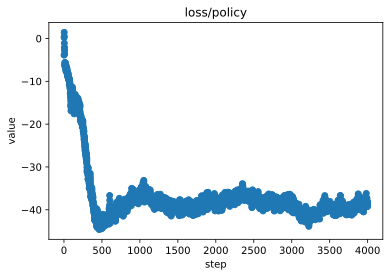

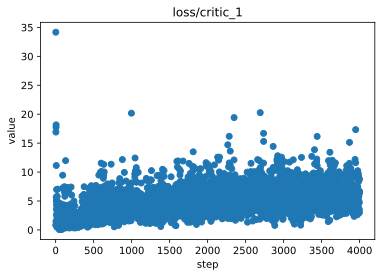

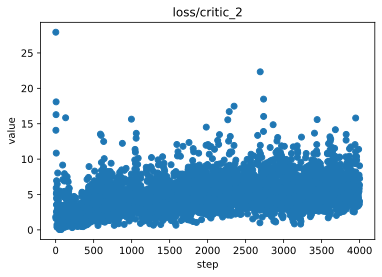

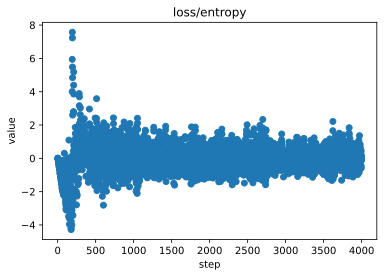

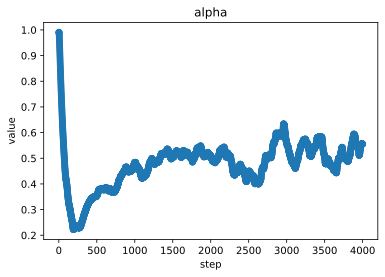

In [11]:
for key in writer.history.keys():
    writer.plot(key)

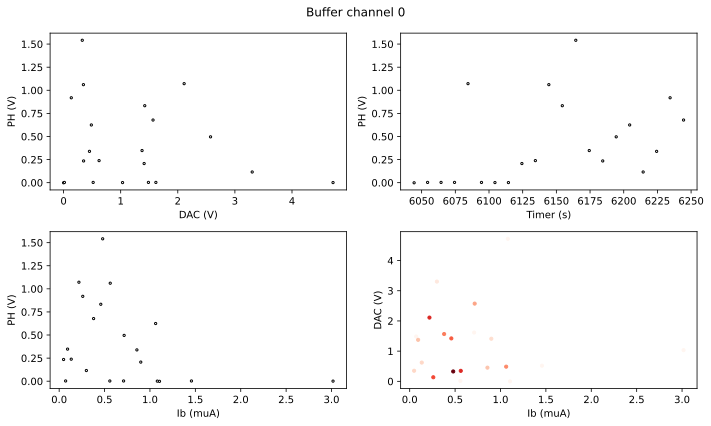

In [12]:
env.detector.plot_buffer()

  0%|          | 0/10 [00:00<?, ?it/s]

[[-0.2587243 -0.6952513]]
[-0.94603293 -0.99998665 -0.69525129 -0.25872433] 8.30495655146406


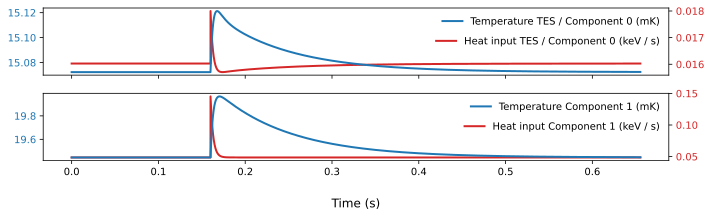

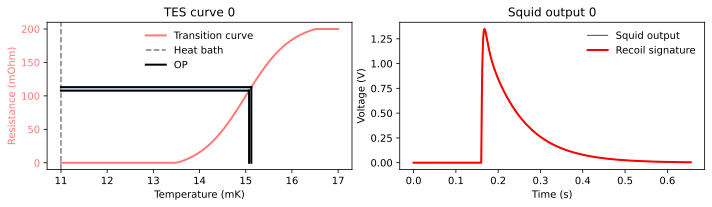

[[-0.674787  -0.8433981]]
[-0.99988317 -0.99997265 -0.84339809 -0.67478698] 1.452145268554483


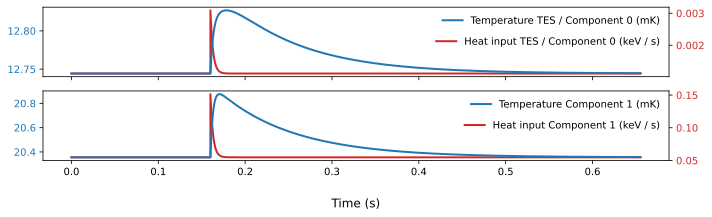

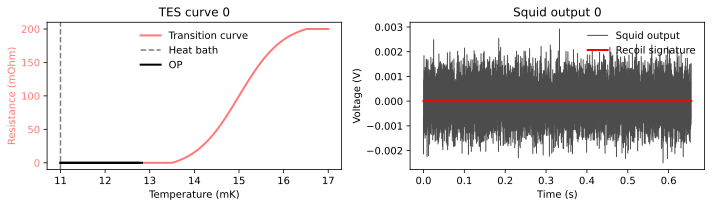

[[-0.6023661 -0.8897549]]
[-0.99990209 -0.99997304 -0.88975489 -0.60236609] 1.2897481609358452


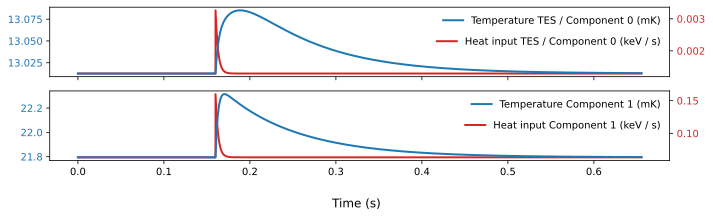

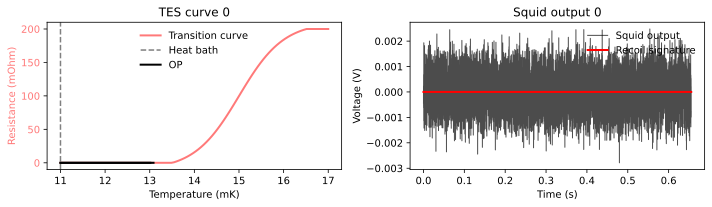

[[-0.6351309  -0.88654125]]
[-0.99989494 -0.99997295 -0.88654125 -0.63513088] 1.3566332014528524


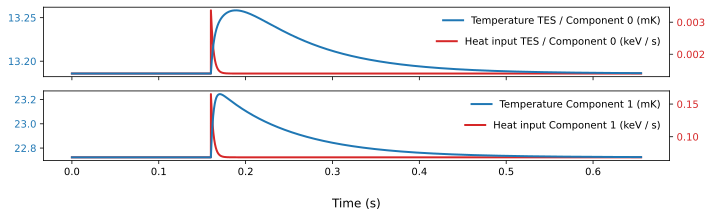

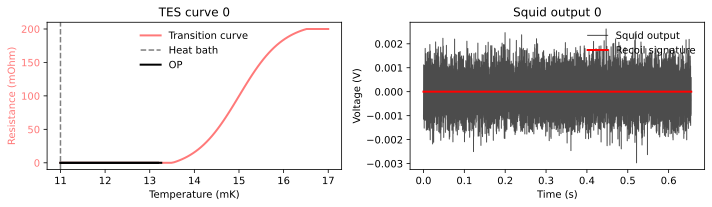

[[-0.62426275 -0.888922  ]]
[-0.99988662 -0.99997236 -0.88892198 -0.62426275] 1.411421099993964


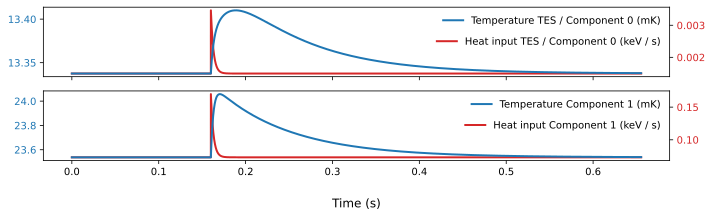

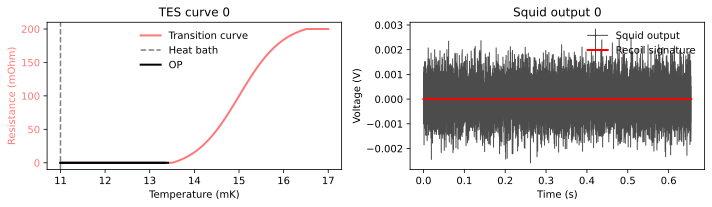

[[-0.6284684  -0.88820434]]
[-0.93349617 -0.99997296 -0.88820434 -0.62846839] 7.807725676575829


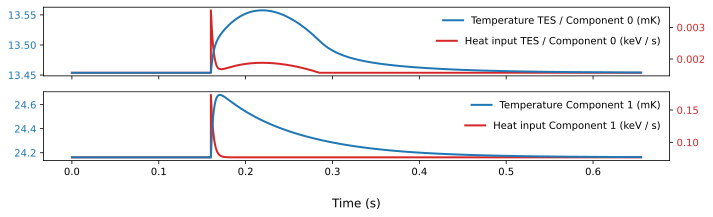

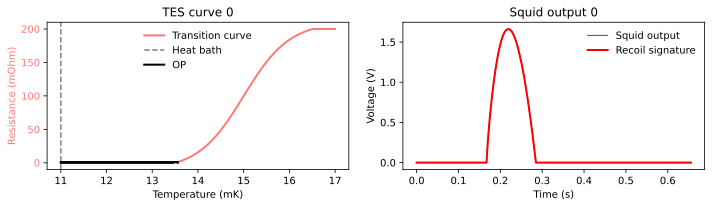

[[-0.62371224 -0.8905103 ]]
[-0.83161776 -0.99997673 -0.89051032 -0.62371224] 8.886733380267575


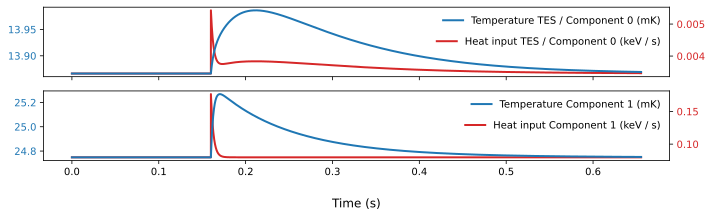

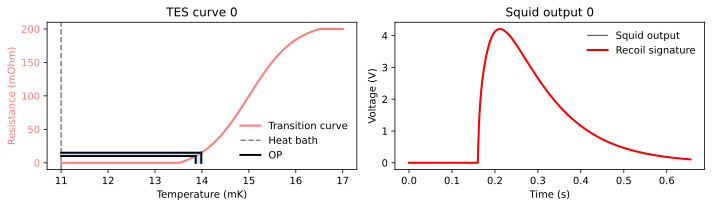

[[-0.6202448 -0.8934579]]
[-0.87399282 -0.99997894 -0.89345789 -0.6202448 ] 8.696828185843826


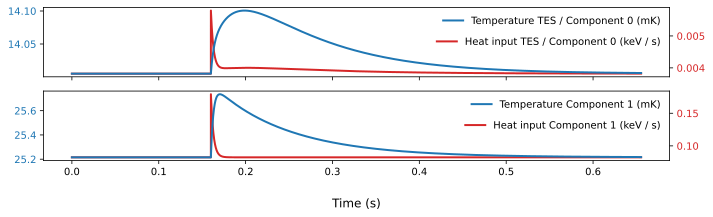

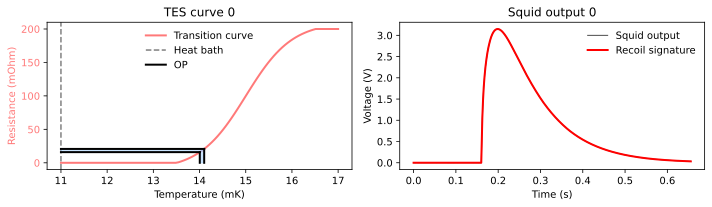

[[-0.62430185 -0.8919955 ]]
[-0.89184932 -0.99998037 -0.89199549 -0.62430185] 8.614121378199053


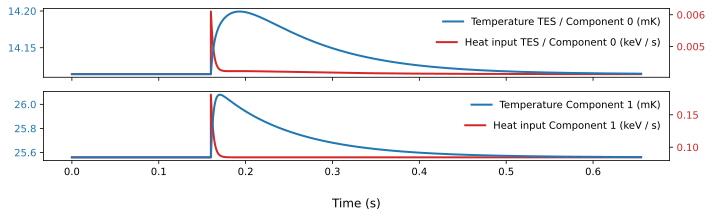

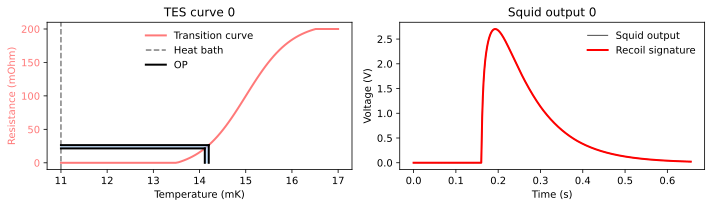

[[-0.6235688  -0.89167583]]
[-0.9018676  -0.99998099 -0.89167583 -0.62356877] 8.548995889939082


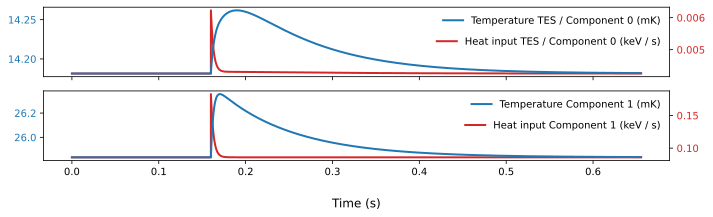

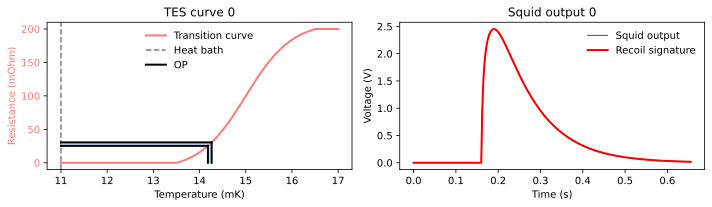

In [13]:
obs, _ = env.reset()
model.policy.eval()
returns = 0
for i in trange(10):
    action, _ = model.predict(obs)
    obs, reward, terminated, truncated, info = env.step(action.flatten())
    print(action)
    print(obs, reward)
    returns += reward
    env.render()
    if terminated or truncated:
        obs, _ = env.reset()

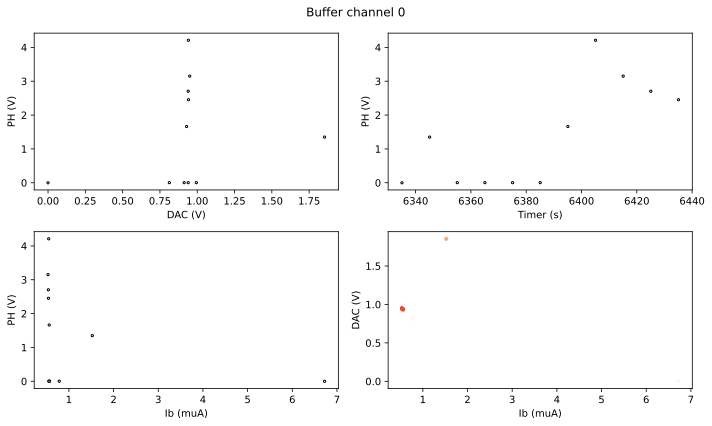

In [14]:
env.detector.plot_buffer()

In [15]:
# env.close()

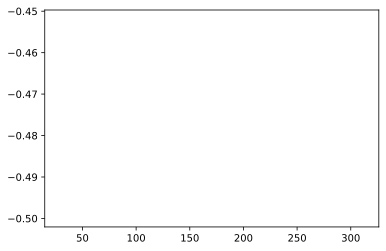

In [16]:
plt.plot(- np.log(- model.buffer.reward_memory[:400]))

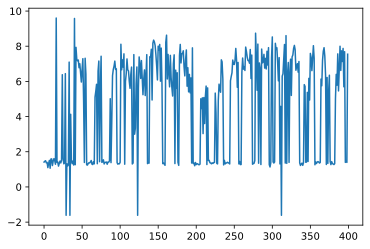

In [17]:
plt.plot(model.buffer.reward_memory[:400])